# Time Series Brics

    01 Import Data via API
    02 Data Wrangling
    03 Plots
    04 Decomposition
    05 Testing for stationarity
    06 Stationarizing the Data
    

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

## 01 Import Data via API

In [2]:
import nasdaqdatalink

In [3]:
nasdaqdatalink


<module 'nasdaqdatalink' from 'C:\\Users\\Lenovo\\anaconda3\\Lib\\site-packages\\nasdaqdatalink\\__init__.py'>

In [4]:
# Configure API key 

nasdaqdatalink.ApiConfig.api_key = 'bp2zW4s1iBsxAXLXoVxY'

In [5]:
nasdaqdatalink.get_table('QDL/ODA')


,indicator,date,value
None,,,
0,ZWE_TX_RPCH,2028-12-31,NaN
1,ZWE_TX_RPCH,2027-12-31,NaN
2,ZWE_TX_RPCH,2026-12-31,NaN
3,ZWE_TX_RPCH,2025-12-31,NaN
4,ZWE_TX_RPCH,2024-12-31,NaN
...,...,...,...
9995,WSM_LE,1980-12-31,NaN
9996,WSM_GGXWDN_NGDP,2028-12-31,NaN
9997,WSM_GGXWDN_NGDP,2027-12-31,NaN


In [6]:
# Importing data via API
data= nasdaqdatalink.get_table('QDL/ODA', indicator='USA_NGDPD')
data1= nasdaqdatalink.get_table('QDL/ODA', indicator='BRA_NGDPD')
data2= nasdaqdatalink.get_table('QDL/ODA', indicator='CHN_NGDPD')
data3= nasdaqdatalink.get_table('QDL/ODA', indicator='IND_NGDPD')
data4= nasdaqdatalink.get_table('QDL/ODA', indicator='RUS_NGDPD')
data5= nasdaqdatalink.get_table('QDL/ODA', indicator='ZAF_NGDPD')


In [7]:
# Get table with date RANGE and multiple indicators LE (Employees), GGXWDG_NGDP (Schulden%), GGXWDN Schulden, PPPSH (Investments
# nasdaqdatalink.get_table('QDL/ODA',date='2028-12-31,2027-12-31,2026-12-31', indicator='ZWE_TX_RPCH,ZWE_TXG_RPCH,ZWE_TM_RPCH')

## 02 Data Wrangling

In [8]:
data.columns

Index(['indicator', 'date', 'value'], dtype='object')

In [9]:
data.shape


(49, 3)

In [10]:
# Dropping column
data = data.drop(['indicator'], axis=1)
data1 = data1.drop(['indicator'], axis=1)
data2 = data2.drop(['indicator'], axis=1)
data3 = data3.drop(['indicator'], axis=1)
data4 = data4.drop(['indicator'], axis=1)
data5 = data5.drop(['indicator'], axis=1)



### Subsets

In [11]:
# Creating subset with no dates in the future
data_sub = data.loc[(data['date'] >= '1980-01-01') & (data['date'] < '2023-12-31')]
data_sub1 = data1.loc[(data1['date'] >= '1980-01-01') & (data1['date'] < '2023-12-31')]
data_sub2 = data2.loc[(data2['date'] >= '1980-01-01') & (data2['date'] < '2023-12-31')]
data_sub3 = data3.loc[(data3['date'] >= '1980-01-01') & (data3['date'] < '2023-12-31')]
data_sub4 = data4.loc[(data4['date'] >= '1980-01-01') & (data4['date'] < '2023-12-31')]
data_sub5 = data5.loc[(data5['date'] >= '1980-01-01') & (data5['date'] < '2023-12-31')]

In [12]:
# Set 'date' as index
data_sub.set_index('date', inplace=True)
data_sub1.set_index('date', inplace=True)
data_sub2.set_index('date', inplace=True)
data_sub3.set_index('date', inplace=True)
data_sub4.set_index('date', inplace=True)
data_sub5.set_index('date', inplace=True)



In [13]:
data_sub.head()

,value
date,
2022-12-31,25464.475
2021-12-31,23315.075
2020-12-31,21060.450
2019-12-31,21380.950
2018-12-31,20533.075


### 03 Plots

#### USA

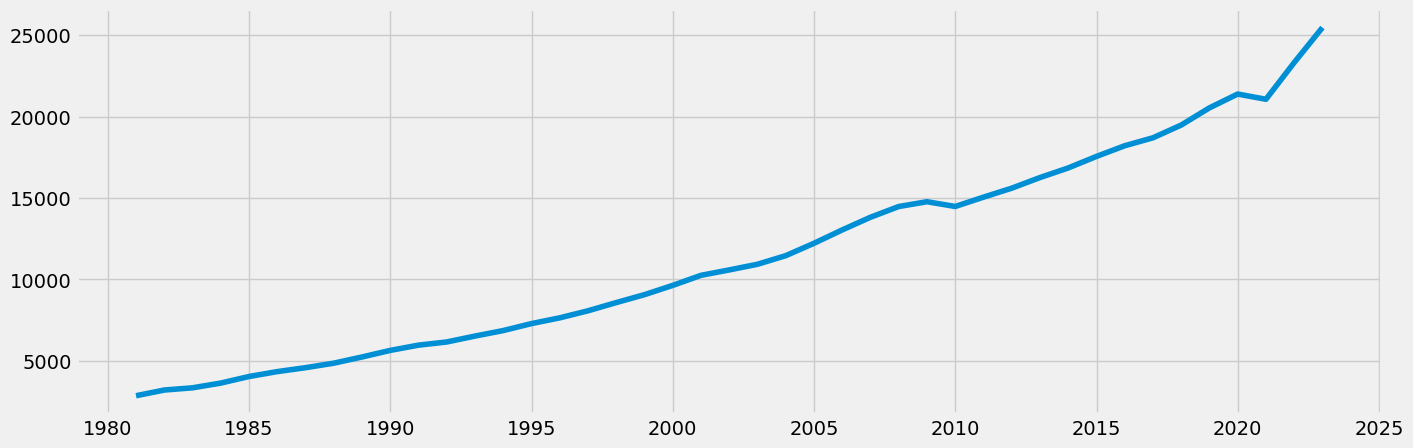

In [14]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub)

#### Brazil

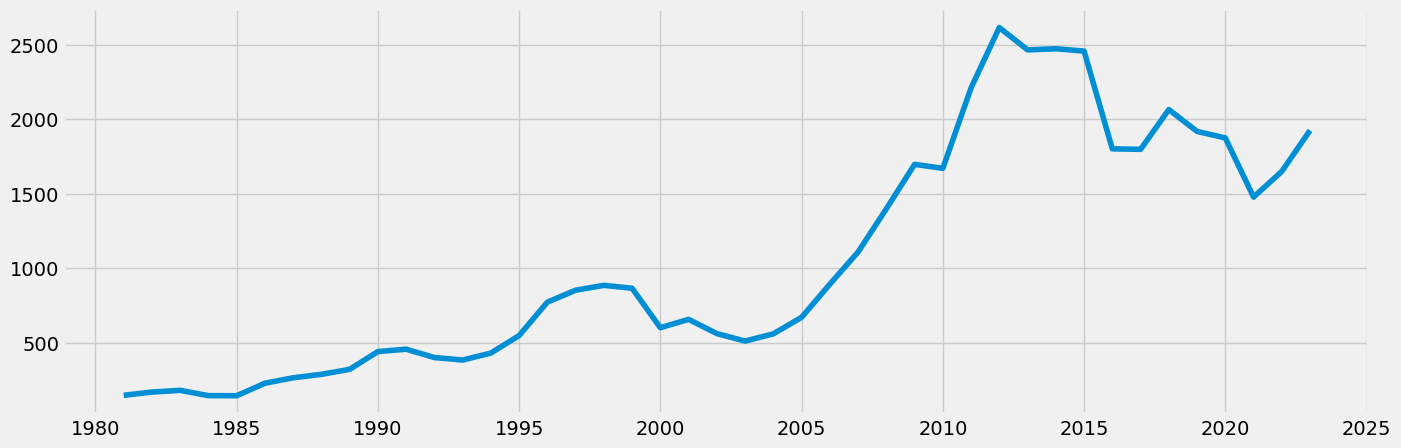

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub1)

#### China

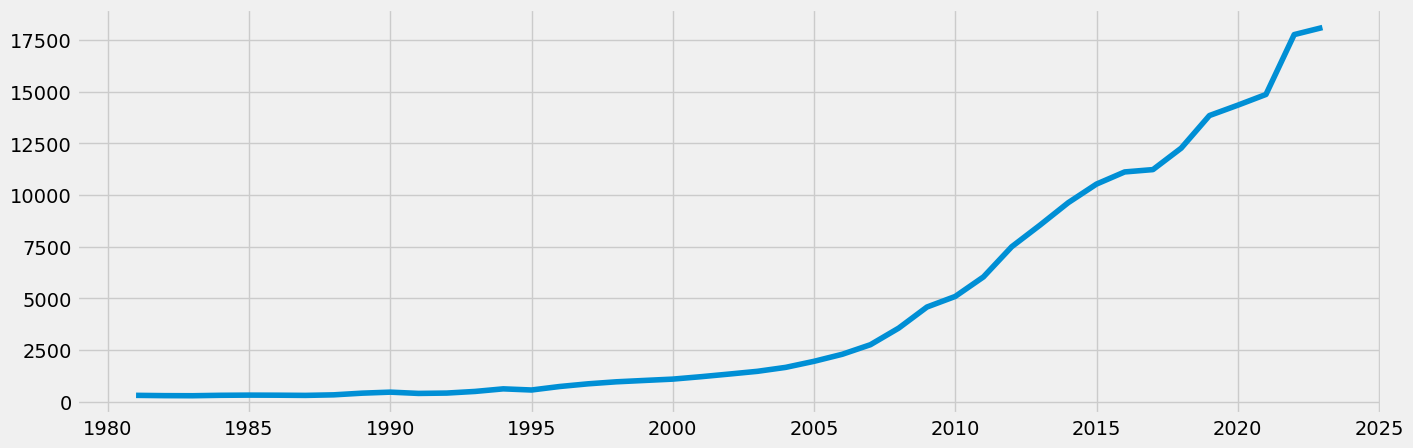

In [16]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub2)

#### India

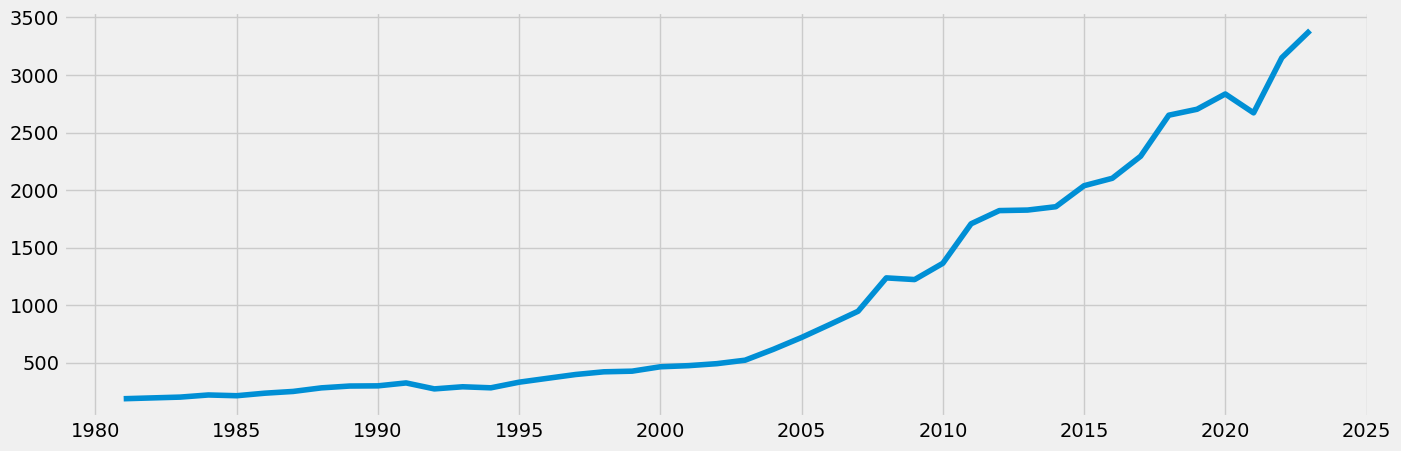

In [17]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub3)

#### Russia

#### South Africa

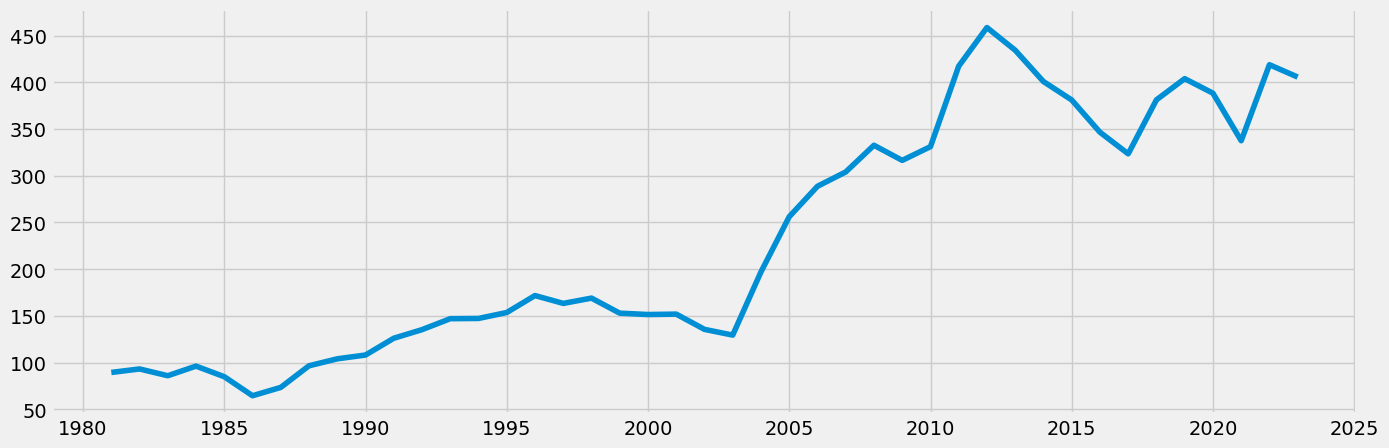

In [18]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data_sub5)

### Checking for missing values 

In [19]:
# Check for missing values (you shouldn't have any)

data_sub4.isnull().sum() 

# Russia has 12 missing values

value    12
dtype: int64

In [20]:
# Check for duplicates

dups = data_sub4.duplicated()
dups.sum()

# Russia has 11 duplicates

11

## 04 Time-series analysis: decomposition

    Decomposition
    Plots

In [21]:

from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

### Decomposition

In [22]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive', period=1)
decomposition1 = sm.tsa.seasonal_decompose(data_sub1, model='additive', period=1)
decomposition2 = sm.tsa.seasonal_decompose(data_sub2, model='additive', period=1)
decomposition3 = sm.tsa.seasonal_decompose(data_sub3, model='additive', period=1)
decomposition5 = sm.tsa.seasonal_decompose(data_sub5, model='additive', period=1)

In [23]:
# Russia
#decomposition4 = sm.tsa.seasonal_decompose(data_sub4, model='additive', period=1)


### Plots

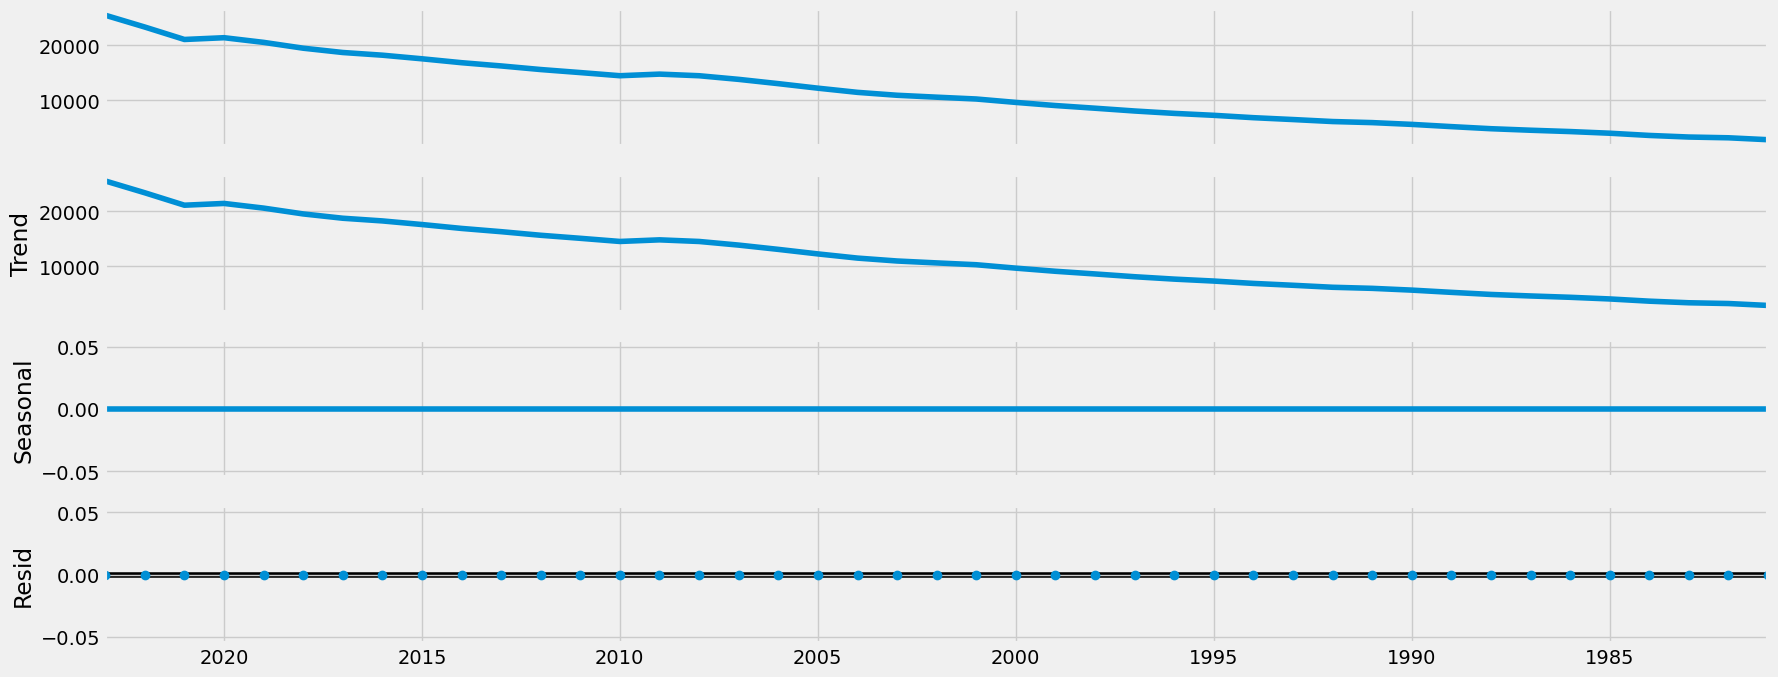

In [24]:
# USA

decomposition.plot()
plt.show()

In [49]:
data.columns

Index(['date', 'value'], dtype='object')

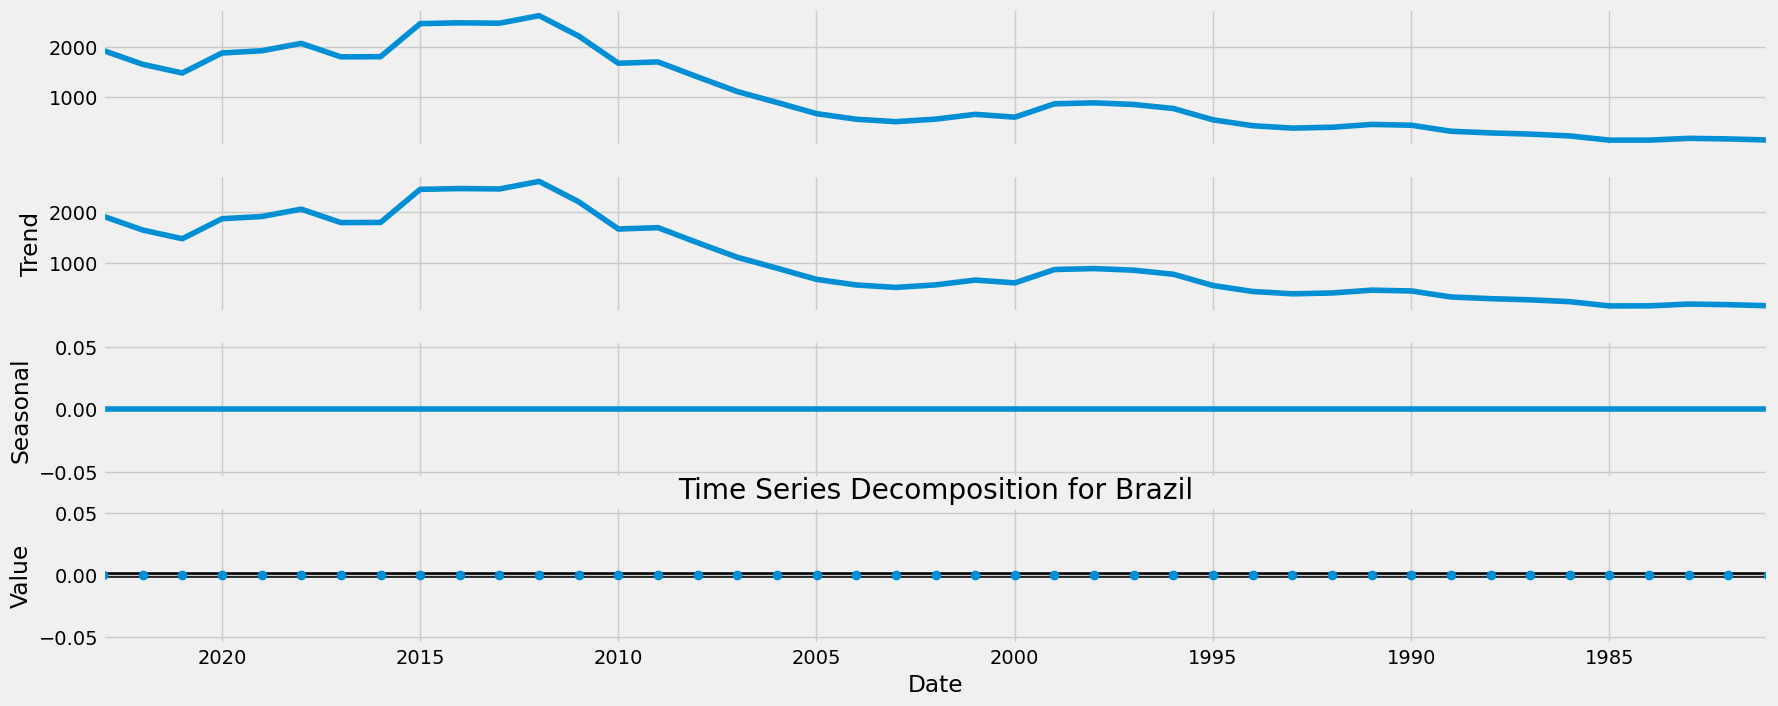

In [52]:
# Visualisierung der Zeitreihen-Grafik
decomposition1.plot()
plt.title('Time Series Decomposition for Brazil')  # Setzen Sie einen geeigneten Titel
plt.xlabel('Date')
plt.ylabel('Value')

# Speichern Sie die Zeitreihen-Grafik ab
file_path_time_series = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations\Time_Series_Decomposition_Brazil.png'
plt.savefig(file_path_time_series)

# Anzeigen der Zeitreihen-Grafik (optional)
plt.show()

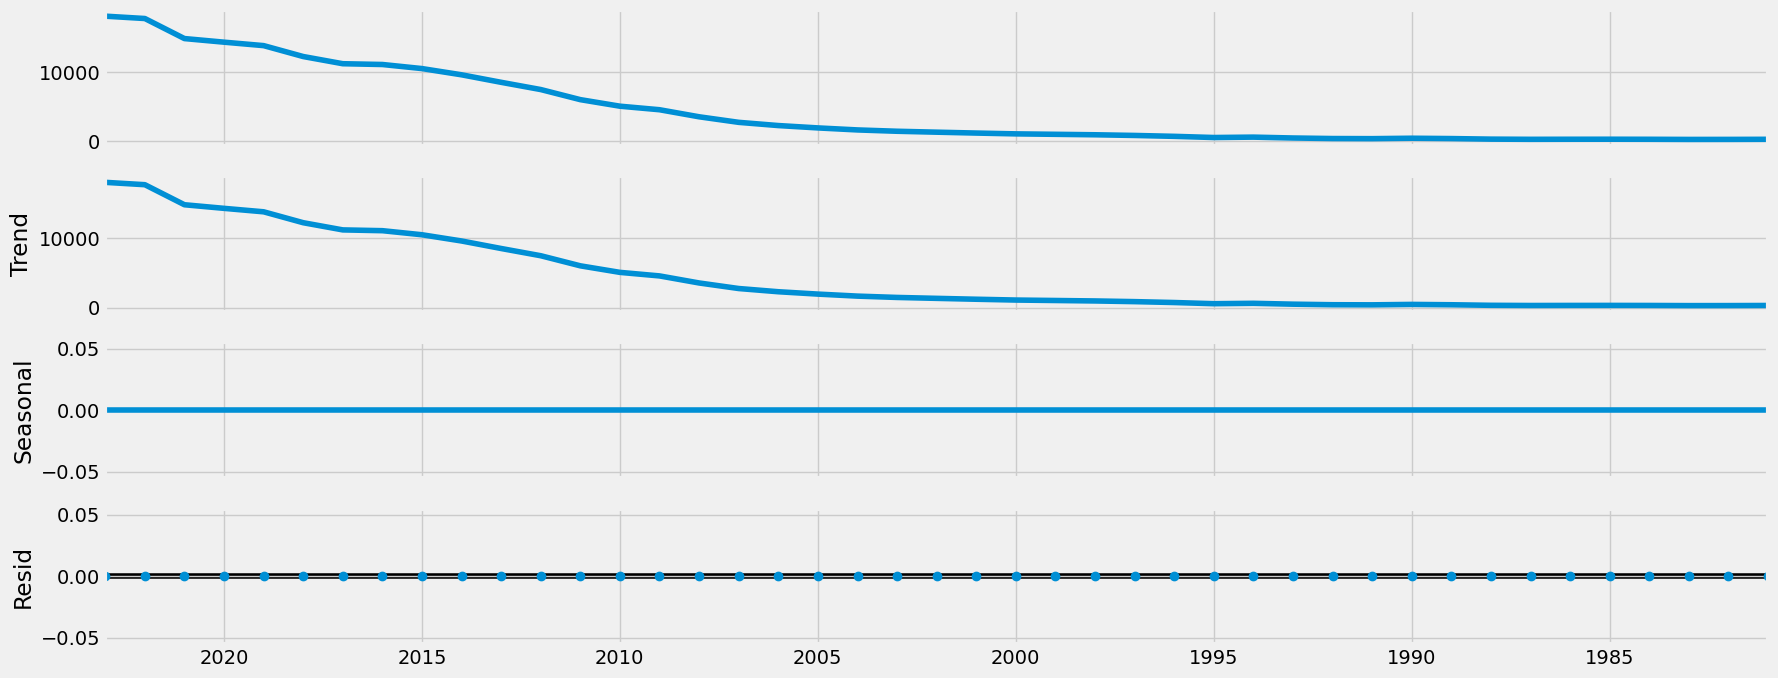

In [26]:
# China
decomposition2.plot()
plt.show()

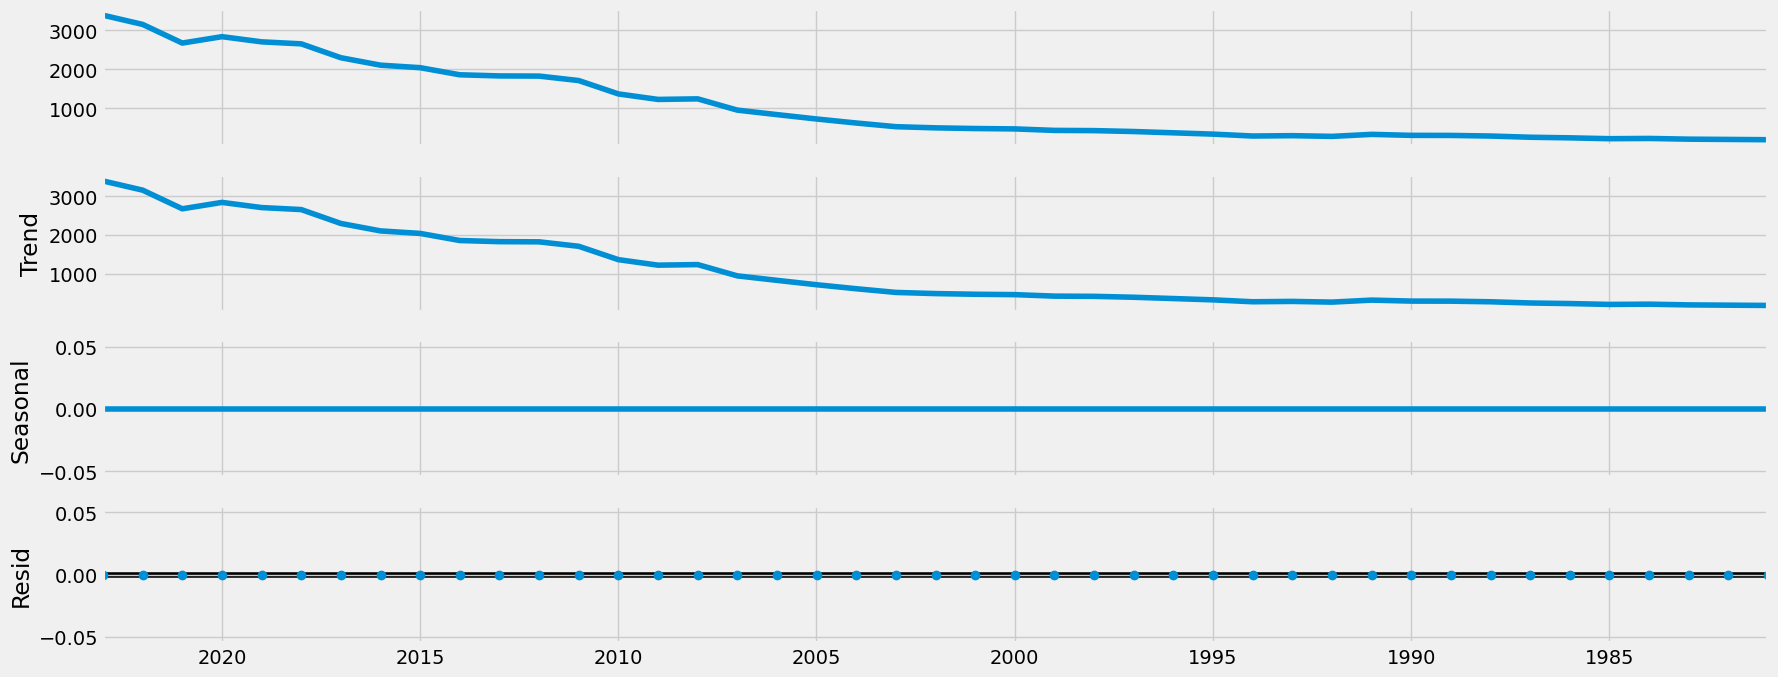

In [27]:
# India
decomposition3.plot()
plt.show()

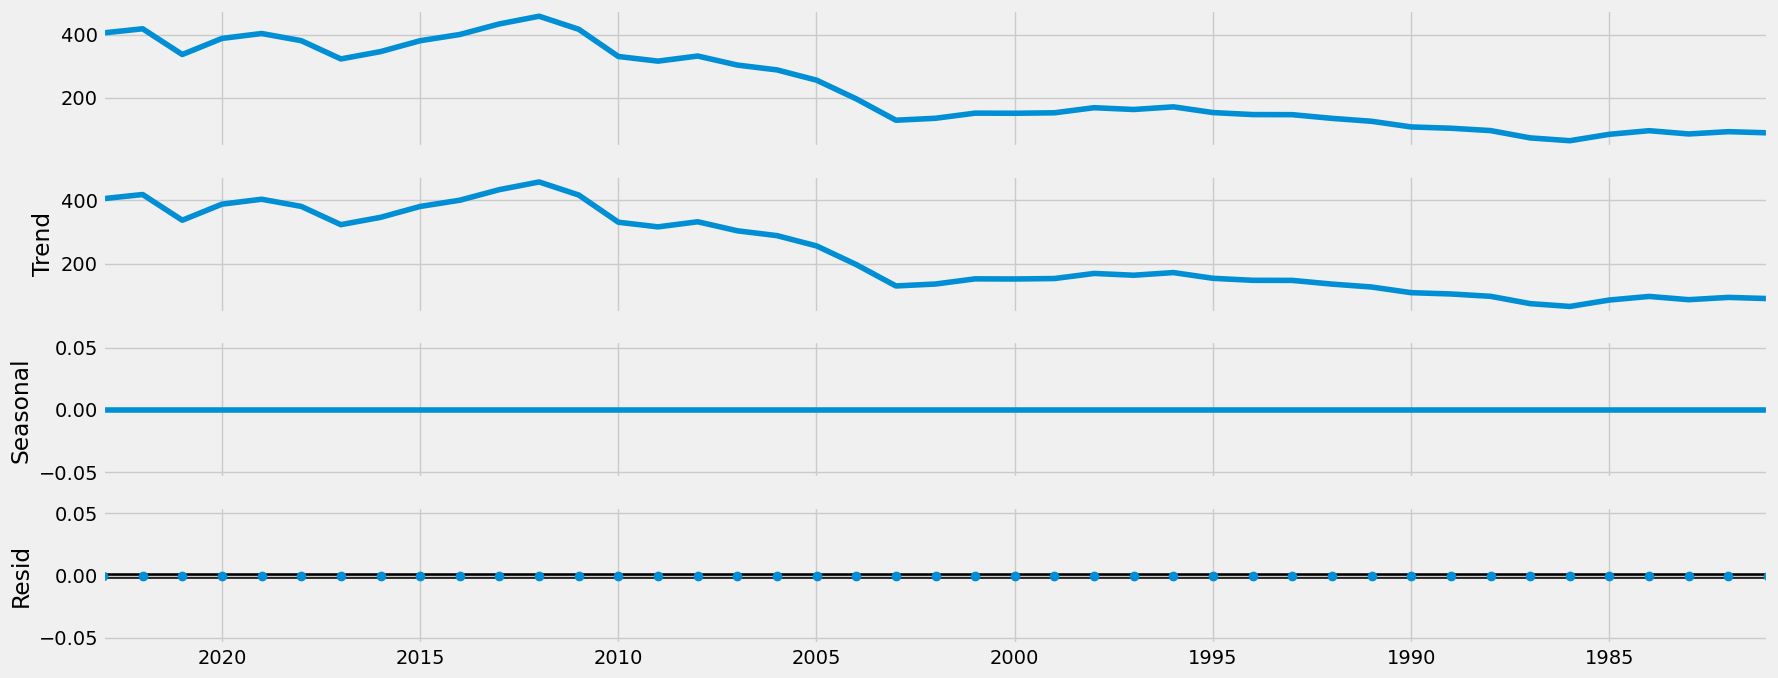

In [28]:
# South Africa
decomposition5.plot()
plt.show()

## 05 Testing for stationarity

  Dickey - Fuller  
  Autocorrelations

### Dickey - Fuller

In [29]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.610240
p-value                         0.090899
Number of Lags Used             1.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


#### Result of Dickey Fuller Test - The p-value is 0.09 which is not significant enough.
 #   The data is non-stationary! It has a trend

### Autocorrelations

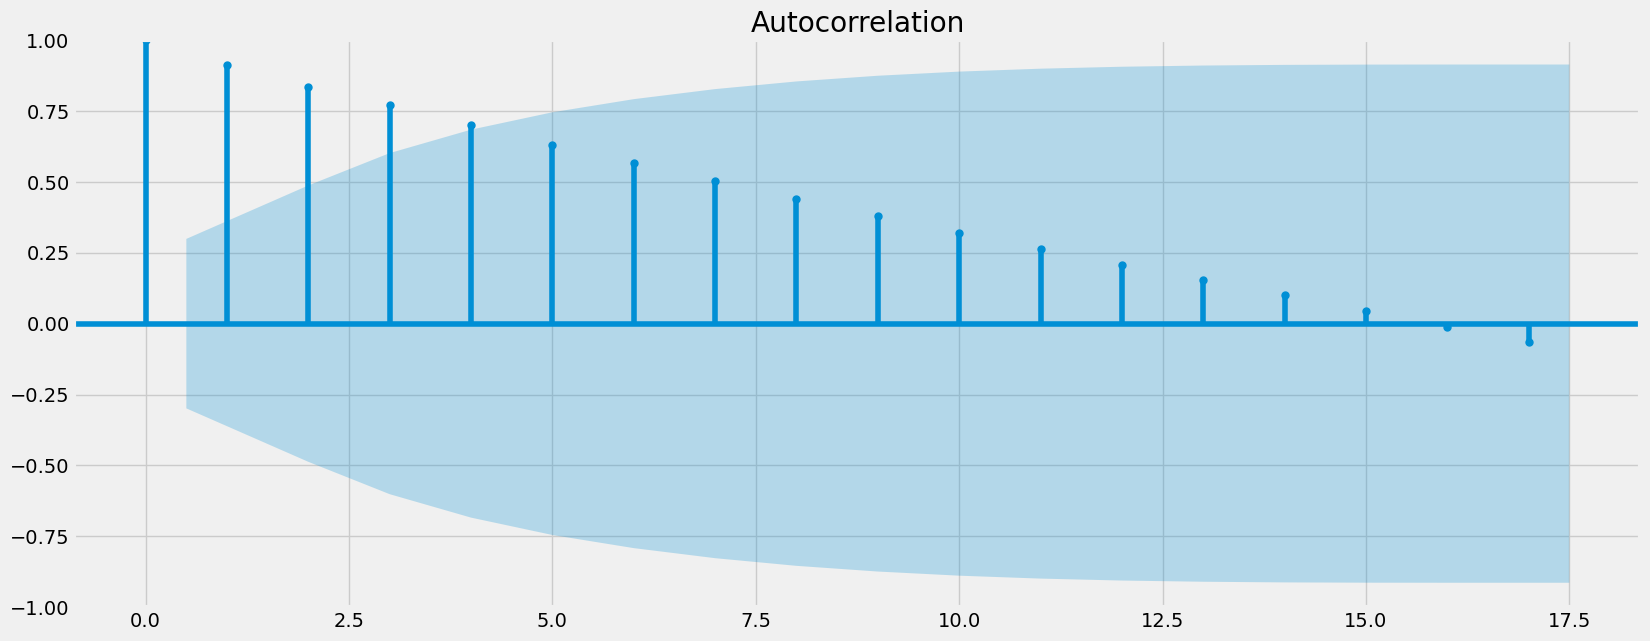

In [55]:
# Annahme: data_sub ist Ihre Zeitreihen-Datenquelle
# Visualisierung des Autokorrelationsdiagramms
plot_acf(data_sub)

# Speichern Sie das Autokorrelationsdiagramm ab
file_path_acf = r'C:\Users\Lenovo\OneDrive\Dokumente\CareerFoundry\Data Immersion\6. Advanced Analytics and Dashboard Design\BRICS\04 Analysis\Visualizations\Autocorrelation_Plot.png'
plt.savefig(file_path_acf)

# Anzeigen des Autokorrelationsdiagramms (optional)
plt.show()

## 06 Stationarizing the Data

    Stationarizing
    Dickey - Fuller
    Autocorrelation

### Stationarizing

In [31]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [32]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [33]:
data_diff.head()

,value
date,
2021-12-31,-2149.400
2020-12-31,-2254.625
2019-12-31,320.500
2018-12-31,-847.875
2017-12-31,-1055.725


In [34]:
data_diff.columns

Index(['value'], dtype='object')

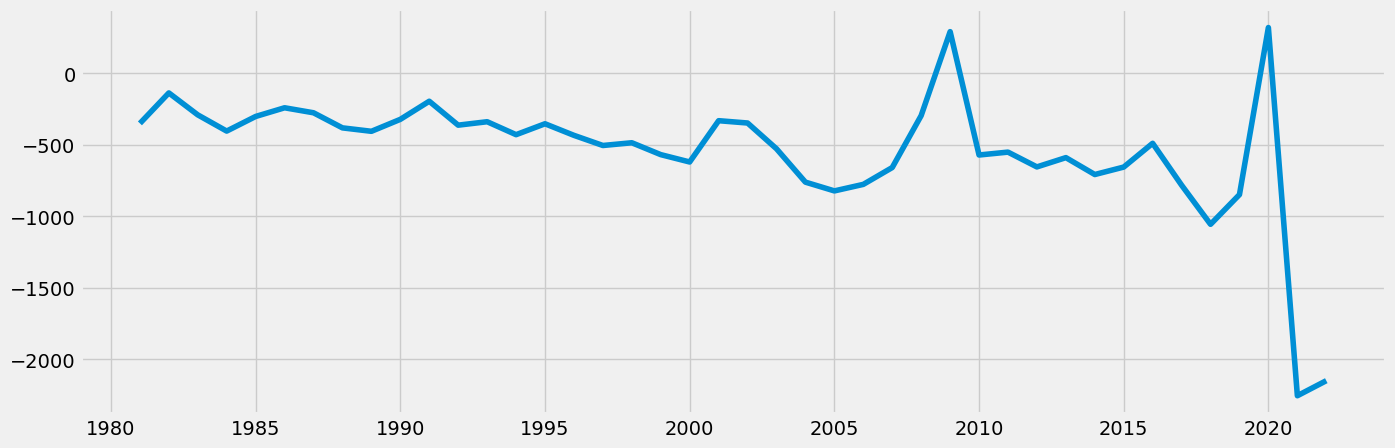

In [35]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Dickey - Fuller

In [36]:
dickey_fuller(data_diff)

# The Test Statistic now is even smaller than Critical Value (1%). This is very significant! 

Dickey-Fuller Stationarity test:
Test Statistic                -5.741544e+00
p-value                        6.258808e-07
Number of Lags Used            0.000000e+00
Number of Observations Used    4.100000e+01
Critical Value (1%)           -3.600983e+00
Critical Value (5%)           -2.935135e+00
Critical Value (10%)          -2.605963e+00
dtype: float64


### Autocorrelation

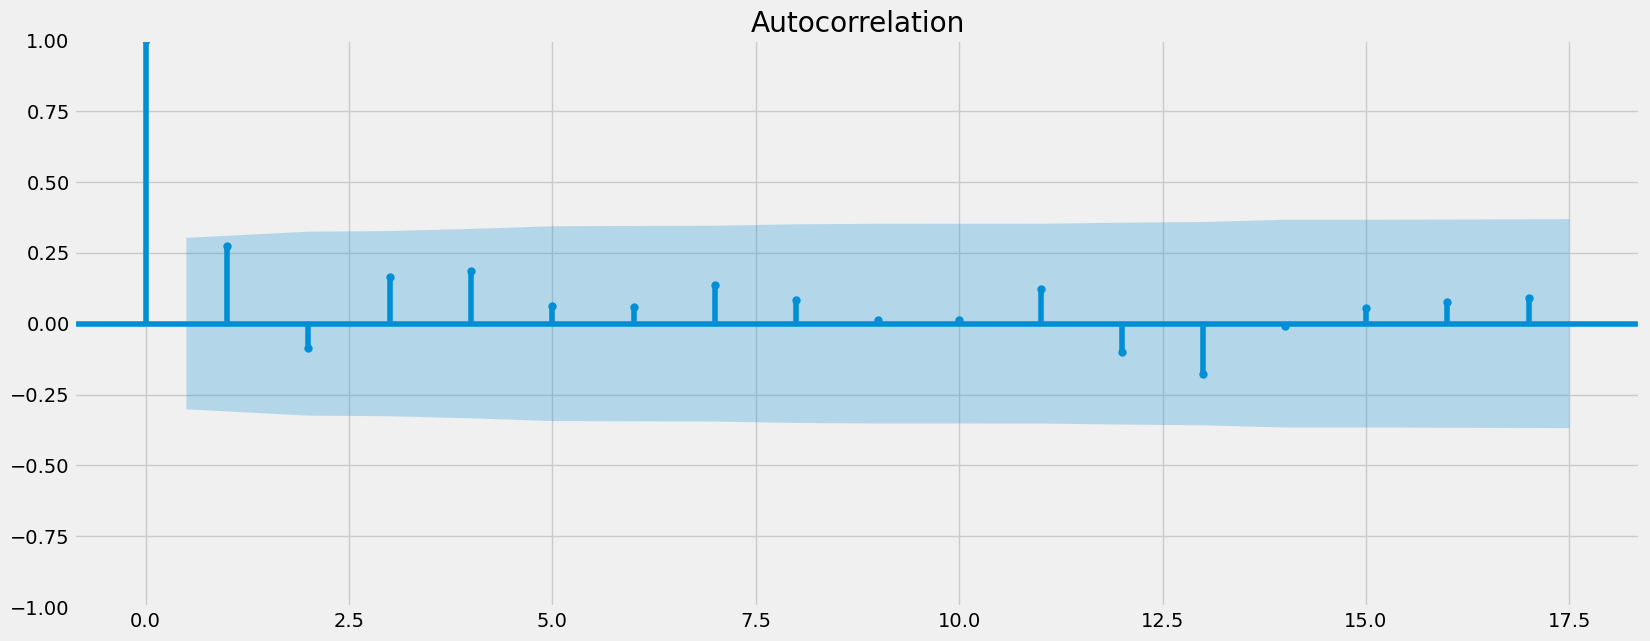

In [37]:
plot_acf(data_diff)
plt.show()

#### The first leg is already within the confidence interval